In [11]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset

file_path = 'Housing.csv'     # Update the path if necessary
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())     # Display first 5 rows
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
    exit()


Dataset loaded successfully!
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [26]:
# Display dataset shape

shape = data.shape
print(f"Dataset contains {shape[0]} rows and {shape[1]} columns.\n")

Dataset contains 545 rows and 13 columns.



In [31]:
# Select numerical column for analysis
numerical_column = input("\nEnter the name of the numerical column: ")


Enter the name of the numerical column:  parking


Statistics for 'parking':
Mean: 0.6935779816513762
Median: 0.0
Mode: 0
Standard Deviation: 0.8615857504605412
Variance: 0.7423300053966541
Range: 3


C:\Users\Rakshitha\AppData\Local\Temp\ipykernel_11492\1410218741.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_column], kde = True, color = 'blue')


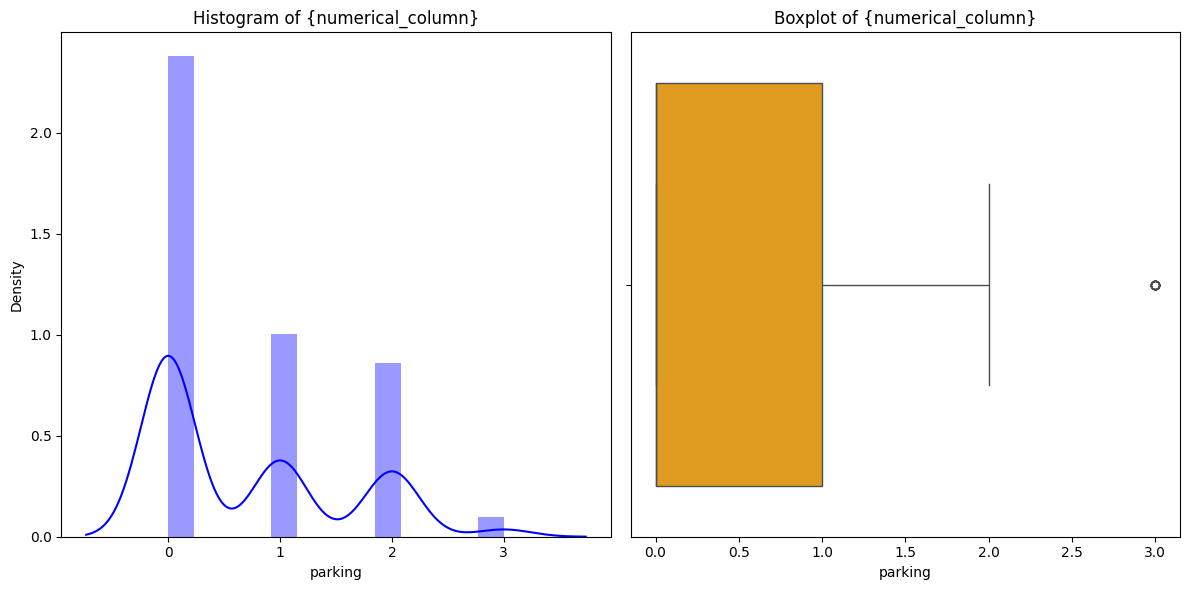

Outliers Detected in {numerical_column}:          price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
1    12250000  8960         4          4        4      yes        no       no   
3    12215000  7500         4          2        2      yes        no      yes   
47    7490000  6600         3          1        4      yes        no       no   
93    6300000  7200         3          2        1      yes        no      yes   
225   4753000  6440         2          1        1      yes        no       no   
247   4550000  8400         4          1        4      yes        no       no   
299   4200000  7000         3          1        1      yes        no       no   
304   4193000  8250         3          1        1      yes        no      yes   
323   4025000  5400         3          1        1      yes        no       no   
331   3920000  7260         3          2        1      yes       yes      yes   
401   3500000  9500         3          1        2      yes        n

In [32]:
if numerical_column in data.columns:

    #compute Descriptive Statistics
    mean = data[numerical_column].mean()
    median = data[numerical_column].median()
    mode = data[numerical_column].mode()[0]
    std_dev = data[numerical_column].std()
    variance = data[numerical_column].var()
    value_range = data[numerical_column].max() - data[numerical_column].min()

    #Display statistics
    print(f"Statistics for '{numerical_column}':")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Range: {value_range}")

    # Visualization
    plt.figure(figsize = (12,6))

    # Histogram with KDE (Kernel Density Estimation)
    plt.subplot(1,2,1)
    sns.distplot(data[numerical_column], kde = True, color = 'blue')
    plt.title('Histogram of {numerical_column}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x = data[numerical_column], color = 'orange')
    plt.title('Boxplot of {numerical_column}')

    plt.tight_layout()
    plt.show()

    # Identify outliers using IQR
    Q1 = data[numerical_column].quantile(0.25)
    Q3 = data[numerical_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[numerical_column] < lower_bound) | (data[numerical_column] > upper_bound)]

    print("Outliers Detected in {numerical_column}: ", outliers)

else:
    print("Invalid numerical column. \nPlease enter a valid numeric column name.")

In [33]:
# Select Categorical Column for Analysis
categorical_column = input("\nEnter the name of the categorical column: ")


Enter the name of the categorical column:  furnishingstatus


Frequency distribution for '{categorical_column}': 
 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


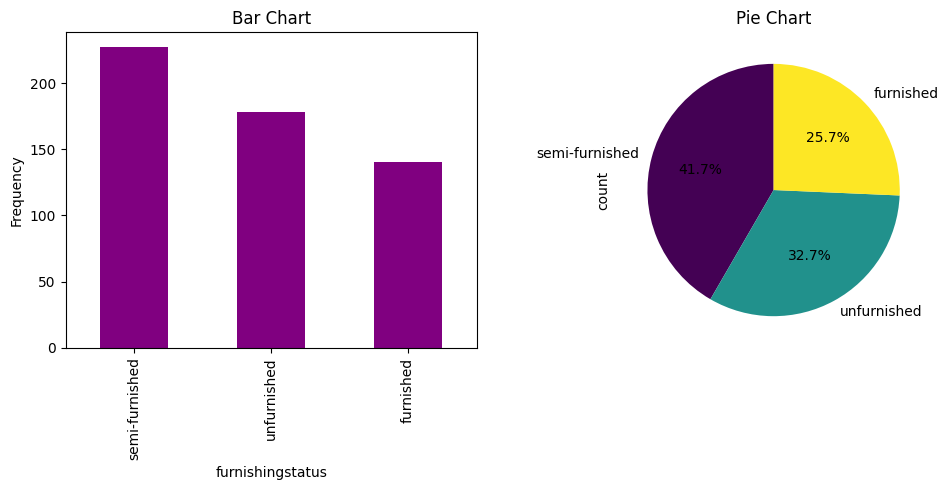

In [34]:
if categorical_column in data.columns:

    # Compute frequency distribution
    frequency = data[categorical_column].value_counts()

    print("Frequency distribution for '{categorical_column}': \n", frequency)

    # Visualization
    plt.figure(figsize = (10,5))

    # Bar Chart
    plt.subplot(1,2,1)
    frequency.plot(kind = 'bar', color = 'purple')
    plt.title('Bar Chart')
    plt.ylabel('Frequency')
    plt.xlabel(categorical_column)

    # Pie Chart
    plt.subplot(1,2,2)
    frequency.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colormap = 'viridis')
    plt.title('Pie Chart')

    plt.tight_layout()
    plt.show()

else:
    print("Invalid categorical column. \nPlease enter a valid categorical column name.")